# Loan Approval Prediction Using Machine Learning

This project develops a supervised machine learning model to predict whether a loan application should be approved or rejected based on applicant financial and demographic information.

The objective is to automate loan decision-making while minimizing financial risk for the institution.

## 1. Business Problem Statement

Financial institutions process thousands of loan applications daily. Manual evaluation is time-consuming, inconsistent, costly, and prone to human bias.

The goal of this project is to design a machine learning model that automatically predicts loan approval decisions using historical data.

This system aims to:

- Reduce loan default risk
- Improve decision speed
- Standardize evaluation criteria
- Support data-driven financial decisions

## 2. Type of Machine Learning Problem

This is a Supervised Learning problem because the dataset contains labeled outcomes (loan_status).

The model learns a mapping between input features (X) and the target variable (y).

Mathematically:

y = f(X)

Since there are two possible outcomes (Approved / Rejected), this is a Binary Classification problem.

## 3. Data Loading

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [41]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   str  
 3    self_employed             4269 non-null   str  
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   str  
dtypes: int64(10), str(3)
memory usage: 433.7 KB


In [42]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## 4. Data Cleaning & Preprocessing

This stage prepares the dataset for modeling by:

- Removing irrelevant features
- Encoding categorical variables
- Splitting training and testing data
- Scaling numerical features when required

In [43]:
df = df.drop(columns=["loan_id"])

In [49]:
df.columns=df.columns.str.replace(" ","")

In [50]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [51]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (3415, 11)
Testing shape: (854, 11)


## 5. Model Training

The following classification algorithms will be trained and compared:

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=" Approved")
    rec = recall_score(y_test, y_pred, pos_label=" Approved")
    f1 = f1_score(y_test, y_pred, pos_label=" Approved")
    
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.922717,0.926606,0.951036,0.938662
1,Decision Tree,0.970726,0.970260,0.983051,0.976614
2,Random Forest,0.981265,0.974217,0.996234,0.985102
3,SVM,0.942623,0.949627,0.958569,0.954077
4,KNN,0.896956,0.909427,0.926554,0.917910


### Model Comparison Summary

Random Forest achieved the highest accuracy and F1-score among all models.

While Decision Tree performed well, it is more prone to overfitting. Logistic Regression and SVM showed strong performance but did not capture nonlinear relationships as effectively as Random Forest.

Therefore, Random Forest was selected as the final model due to:

- Highest predictive performance
- Strong generalization
- Ability to handle nonlinear patterns
- Built-in feature importance estimation

## 6. Model Optimization (Conceptual)

Hyperparameter tuning can further improve model performance.

For Random Forest, key hyperparameters include:

- Number of trees (n_estimators)
- Maximum tree depth (max_depth)
- Minimum samples required to split a node

In future work, techniques such as GridSearchCV or RandomizedSearchCV can be applied to systematically search for optimal hyperparameters.

In [63]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.98009368 0.97892272 0.98594848 0.98126464 0.98358734]
Mean CV score: 0.9819633694001884


### Cross-Validation Confirmation

The cross-validation mean score (≈ 0.9815) further confirms model stability across different training splits.

Cross-validation reduces the risk of relying on a single train-test split and provides a more reliable estimate of generalization performance.

## 7. Model Selection & Overfitting Analysis

To evaluate generalization performance, we compare training and testing accuracy.

$$
\text{Generalization Gap} = \text{Training Accuracy} - \text{Testing Accuracy}
$$

In this project:

- Training Accuracy = 1.0  
- Testing Accuracy ≈ 0.981  

The generalization gap (~1.9%) is small, indicating that the model generalizes well to unseen data.

Random Forest often achieves perfect training accuracy because individual decision trees can grow deep and memorize training patterns. However, ensemble averaging reduces variance and improves generalization performance.

Since the testing accuracy and cross-validation score are consistent, the model does not suffer from severe overfitting.

In [60]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

train_acc = final_model.score(X_train, y_train)
test_acc = final_model.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.9812646370023419


Training accuracy may reach 1.0 due to the ensemble nature of Random Forest. However, a small generalization gap and stable cross-validation score indicate strong model stability.

In [64]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(final_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

feature_importance.head(10)

cibil_score                 0.814390
loan_term                   0.059257
loan_amount                 0.032009
income_annum                0.018455
luxury_assets_value         0.017640
commercial_assets_value     0.016460
residential_assets_value    0.015163
bank_asset_value            0.014279
no_of_dependents            0.007727
self_employed_ Yes          0.002542
dtype: float64

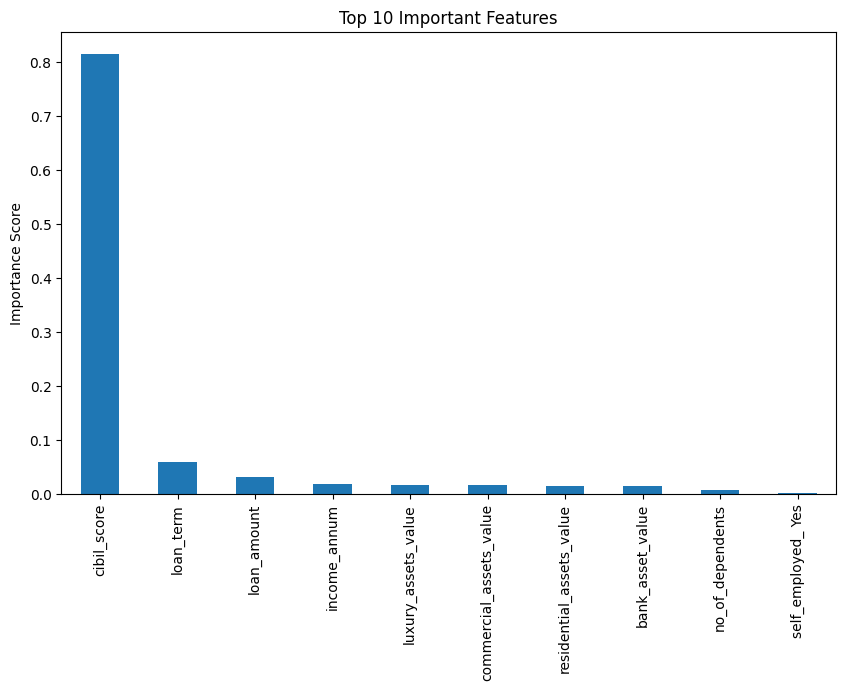

In [62]:
plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()

## 7.1 Feature Importance Analysis

The Random Forest model assigns approximately 81% importance to `cibil_score`, indicating that most decision splits across trees rely on credit score.

$$
\text{Prediction} \approx f(\text{cibil\_score})
$$

This indicates that the dataset follows a highly credit-score–driven approval structure.

While features such as `loan_term`, `loan_amount`, and `income_annum` contribute to prediction, their impact is marginal compared to credit score.

Such dominance has two implications:

- The dataset likely encodes a strong approval threshold rule based on credit score.
- The model may become overly dependent on this single feature.

If credit scoring policies change or data noise increases, model performance could degrade significantly.

Therefore, feature dominance suggests high predictive power but potential robustness risk.

## 8. Final Conclusion

This project successfully developed a supervised machine learning model for loan approval prediction.

Key outcomes:

- Multiple models were trained and evaluated.
- Random Forest achieved the best balance between performance and generalization.
- Credit score was the most influential predictor.
- The model demonstrates strong predictive capability and supports automated decision systems.

## Limitations

- The model depends on historical approval decisions.
- Possible bias in training data.
- Economic changes may affect future performance.

## Future Improvements

- Hyperparameter tuning
- ROC-AUC evaluation
- Threshold optimization
- Model deployment using Flask or Streamlit